# Before we start talking about Rainbow Tables...

## What I mean when I say "widgets"

*Jupyter Widgets* are a feature of Jupyter that allow for limited interactivity. They allow us to manipulate aspects of our Python code using familiar web page features like text boxes. As an example, the code in the following cell creates a simple widget. Click the cell and then hit `Shift+Enter` to execute.

In [ ]:
# `ipywidgets` is the Jupyter widgets Python module
import ipywidgets as widgets
from IPython.display import display

# Text box
textbox = widgets.Text(
    placeholder='Your name here'
)

# A label to place next to the text box
label = widgets.Label(
    value="What's your name?"
)

# 'Submit' button
button = widgets.Button(
    description='Submit',
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)

# Output area for the widgets
output = widgets.Output()

# Display all the widgets we just made
display(label, textbox, button, output)

# Callback function that's called when the 'Submit' button is clicked.
def on_button_clicked(b):
    with output:
        # Remove all previous output
        output.clear_output()
        # Say hello
        print(f'Hello {textbox.value}, you just used a Jupyter widget!')

# Attach the 'button' widget to the callback function.
button.on_click(on_button_clicked)

*See:* https://ipywidgets.readthedocs.io/en/stable/index.html

## Functions: Domain, range, co-domains (and more?!)

Reviewing this will help us all be on the same page when we talk about hash functions.

* ***Function*** - A rule or process that accepts certain values as input and assigns to each valid input *exactly one* output value.
* ***Domain*** - A set of all possible values that are considered valid input for a particular function, '$f()$'.
* ***Co-domain*** - Values (output) that "may possibly come out of a function" (*Math is Fun*, below)
* ***Range*** - The set of all values that can be obtained by applying a function, '$f()$', to every value in the domain. A subset of the co-domain.
* ***Element*** - One item from a domain or co-domain. This term may be used in place of terms like "value," "input," or "output".

*See:* [Domain, Range and Codomain](https://www.mathsisfun.com/sets/domain-range-codomain.html) at *Math is Fun*

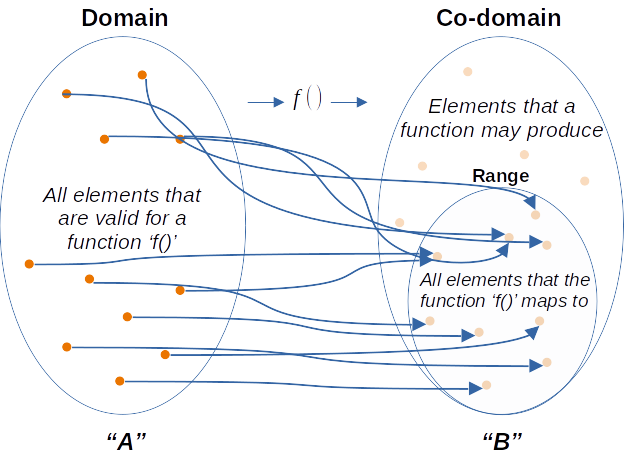

*Notice that:*
* All elements in the domain map to a *single* element in the range - the entire domain is valid input for the function of interest.
* Elements in the range may have more than one element from the domain that maps to it
* $f()$ is a generic, undefined function. It could be any function, it's just standing in as a placeholder.

### Function mad libs

There are a lot of ways someone might say that a function $f()$ is operating on a value `A`, which in turn produces the value `B`. This is my attempt to cover all those ways.  

$f()$...
* Is executed, applied, run
* It "operates on", produces, provides, "results in", "maps to" or simply "maps"

`A`
* Is an element, input, a value, "data", "the pre-image" (use only if writing textbooks)

`B`
* Is an element, output, a value, "data", "the image" (again, for textbooks), "the product"


*Examples:*
* "Applying $f()$ to `A`, we get `B`" ... "produces `B`" ... "results in `B`"
* `B` is produced when `A` is provided as input to $f()$
* "F of `A` is `B`" / "Executing F of `A` results in `B`"
* "F maps `A` to `B`"
* *And on and on...*

### Example

### $f(x) = x^2$

* This function accepts the set of real numbers as input values.
* Since $f(x)$ squares the input value, the *range* (or output value) cannot be negative. So we could say "The range of $f(x)$ is the set of all non-negative real numbers."
* Real numbers, then, could be considered the co-domain.

## A handy hashing widget for later

In my Rainbow Table notebook it's often helpful to be able to easily create hash digests. Rather than constantly scrolling around in that notebook, I've added that widget here. So keep this notebook open to refer back to as you go through the Rainbow Tables notebook.

In [ ]:
from Hash_Widgets import hash_display
hash_display()

## Terminology

* *Algorithm* - Like a recipe or a script for an actor, an algorithm describes a set of instructions to be performed to reach a desired outcome. (*See:* [Wikipedia](https://en.wikipedia.org/wiki/Algorithm)
* *Function* - A rule or process that accepts certain values as input and assigns to each valid input exactly one output value. (See above, but also see: [Wikipedia](https://en.wikipedia.org/wiki/Function_(mathematics)))
* *Hash* - A function that maps data of arbitrary size to fixed-sized value. (*From:* [Wikipedia](https://en.wikipedia.org/wiki/Hash_function))
* *Hash digest* - What we call the output (or *result*) of a hash function.
* *Hash space* - A space (or *set*) containing all possible hash digests that a particular hash algorithm can produce.
* *Integer* - A subset of the natural numbers ranging from negative to positive, and including zero. `..., -1, 0, 1, ...` (*See:* [Wikipedia](https://en.wikipedia.org/wiki/Integer))
* *Iteration* - Very simliar to a "repetition"; used to describe doing the same thing again. "How long did it take you to reach this prototype?" "It took hundreds of iterations." 
* *Key* - For our purposes here, the term "key" is used interchangably with "password" and possibly even "plain text."
* *Key:Digest pair* - Communicates that we're talking about a key and its corresponding hash digest - the result after hashing a key. If the key `abc`, when hashed, produced the digest `xyz`, then we'd put them together in the pair `abc:xyz`.
* *Key space* - Like a hash space, a key space contains all the possible *keys* that can exist, given some known key restrictions. For example, if we said "All keys must be two numbers in length, using the digits 0-9]," then the corresponding key space is all the numbers from `00` to `99`.
    * Strangely, [Wikipedia](https://en.wikipedia.org/w/index.php?title=Key_space_(cryptography)&redirect=no) doesn't define "key space" the same way I do here. They speak in terms of bits, which, I understand why they're doing it that way, but, makes things more complicated.
* *Maps* or *Mapping* - When we say 'A' maps to 'B', we mean that some process/function/algorithm is acting on 'A' and as a result, produces (maps to) 'B'. See "Function mad libs", above.
* *Password* - The prized string of characters that should be unique, difficult to guess, and kept secret. I'll often use the terms "key" or "plain text key" interchangably with "password."
* *Plain text* - AKA "Key" or "Password." Saying *plain text* emphasizes that the contents of the text haven't been subjected to encryption or hashing. It also implies that this is the part the human deals with.
* *String* - This might have two, slightly different meanings depending on the context.
    * *The way I'll probably use the term* - The same way someone might go "He made a series of errors." "I made a *string* of mistakes." "Take a *string of characters* and apply the hash function."
    * *In a programming context* - A group of characters without much restriction on those characters."
        * *In Python:*
            * "This" is definitely a string.
            * 5 is an integer
            * "5" is a string, because it's in quotes. This means Python won't treat it like an integer.
        * The word "String," in the programming context, probably won't come up in these workshops.
